In [1]:
import pickle, blosc
from csv_load import * # the file with our modules

## Files

Files origin:

Before loading csv's, they have been converted to utf8, and then the content has been compressed as pickles.   
The converstion is done with the convert.sh file located in *bash_scripts* dir.   
Note that the script requires you to have saved the csv files into the *files/set1* folder located at the root of the git repo.  
The script automatically converts every csv to the right format, and save them into a new subfolder *utf8*. 


In [2]:
bob_file = "../files/pickles/1/Ball_on_Bar_-_Child_-_RIGHT_-_11_59.pickle"

In [3]:
with open(bob_file, "rb") as f:
    compressed_pickle = f.read()
    depressed_pickle = blosc.decompress(compressed_pickle)
dfs_ball = pickle.loads(depressed_pickle)
print("Dataframes contained in the files : {}".format(len(dfs_ball)))

Dataframes contained in the files : 3


## Trial analysis

Previous line means that we have 3 dataframes in the file, ie. 3 Trials for which we want to access data

In [4]:
for i in range(len(dfs_ball)):
    trial = Trial(dfs_ball[i], name=bob_file, filter=None)
    print(trial.count, trial.duration, sep=' | ')

65528.0 | 65.527
61899.0 | 61.898
2792.0 | 2.791


These are the frames count and trial duration (seconds) of each of the 3 trials.  
These numbers confirm that we have one frame per ms, we can access the rate of each experiment with the following lines :

In [5]:
for i in range(len(dfs_ball)):
    trial = Trial(dfs_ball[i], name=bob_file, filter=None)
    print(trial.rate)   # in frame/s

0.001
0.001
0.001


### Events
Before plotting the kinematics, it might be interesting to access events from a trial :

In [6]:
for i in range(len(dfs_ball)):
    trial = Trial(dfs_ball[i], name=bob_file, filter=None)
    print(i, trial.events_cnt)     # counts the events for each Trial

0 {'saccades': 72, 'fixations': 15, 'blinks': 2}
1 {'saccades': 81, 'fixations': 23, 'blinks': 0}
2 {'saccades': 15, 'fixations': 2, 'blinks': 0}


It is also possible to access every single event start in an ordered list, getting its frame # and frame time (the s at which the event).  
**Warning** wordy output, uncomment the line to display

In [7]:
for i in range(len(dfs_ball)):
    trial = Trial(dfs_ball[i], name=bob_file, filter=None)
    #print("Dataframe ", i+1)   
    #print(trial.events)

Or even access only a certain type of event individually, without loading the whole event dict:
Currently outputs the start of the chosen event, in frame # and frame time (s)

In [8]:
for i in range(len(dfs_ball)):
    trial = Trial(dfs_ball[i], name=bob_file, filter=None)
    # print(trial.saccades)
    print("Dataframe", i,"\n", trial.fixations)
    #print(trial.blinks)

Dataframe 0 
 [(1488.0, 1.48800004), (1629.0, 1.62899995), (3858.0, 3.85800004), (3957.0, 3.95700002), (6212.0, 6.21199989), (8106.0, 8.10599995), (12533.0, 12.533), (13977.0, 13.9770002), (14025.0, 14.0249996), (14270.0, 14.2700005), (24144.0, 24.1439991), (24386.0, 24.3859997), (24817.0, 24.8169994), (26062.0, 26.0620003), (27593.0, 27.5930004), (27843.0, 27.8430004), (35943.0, 35.9430008), (37592.0, 37.5919991), (37857.0, 37.8569984), (39502.0, 39.5019989), (42721.0, 42.7210007), (43270.0, 43.2700005), (51647.0, 51.6469994), (53798.0, 53.7980003), (57902.0, 57.9020004), (58747.0, 58.7470016), (59961.0, 59.9609985), (60908.0, 60.9080009), (62882.0, 62.882), (63174.0, 63.1739998)]
Dataframe 1 
 [(755.0, 0.754999995), (2546.0, 2.546), (2593.0, 2.59299994), (3239.0, 3.23900008), (3263.0, 3.26300001), (4761.0, 4.76100016), (6014.0, 6.01399994), (6162.0, 6.16200018), (9241.0, 9.24100018), (9437.0, 9.43700027), (13149.0, 13.1490002), (13298.0, 13.2980003), (14852.0, 14.8520002), (15543.0, 

Statistics for the events for each trial are also available:  
Currently outputs the mean event duration and standard deviation, in seconds

In [9]:
for i in range(len(dfs_ball)):
    trial = Trial(dfs_ball[i], name=bob_file, filter=None)
    print(i, trial.event_mean)

0 {'saccades': (0.04, 0.03), 'fixations': (0.91, 0.69), 'blinks': (0.08, 0.03)}
1 {'saccades': (0.03, 0.02), 'fixations': (0.59, 0.52), 'blinks': None}
2 {'saccades': (0.04, 0.04), 'fixations': (0.22, 0.03), 'blinks': None}


### Plots

The long trials create plots with many points, and cause lag on .ipynb notebooks.  
In this example they can be saved with the *save=True* option.

Shorter trial example :


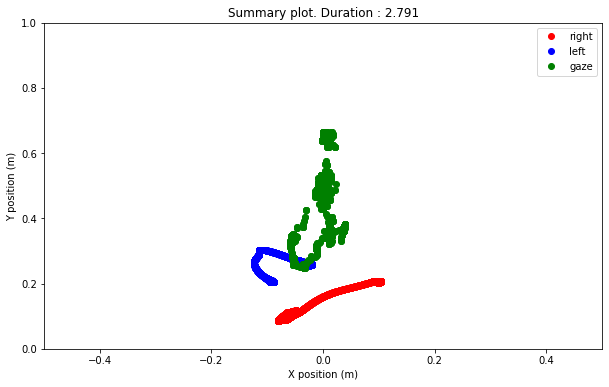

In [10]:
for i in range(len(dfs_ball)):
    trial = Trial(dfs_ball[i], name=bob_file, filter=None)
    title = str(i) + "_example.png"  # png saves and loads faster, but other resolutions are possible
    trial.plot_movements(name = title,save=True, show=False)
print("Shorter trial example :")
trial.plot_movements(name = title,save=False, show=False)

####TODO: animations code